# CS445: Term Project

#### Victor Weeks & Josh Lutz

Note: I think I am going to explore changing my idea to taking current inventory info and deciding how best to make a profit

#### Get material data

In [47]:
import urllib.request, urllib.error, urllib.parse
api_key = "Bearer 51DD34C0-ABC4-E54C-A3F2-8E7500AE5F74705C18C6-B5BD-431A-8A6A-304EB4F2A24A"
headers = {'Authorization': api_key}

In [48]:
def getAccountMaterials():
        """Makes a request on the GW2 API."""
        url = 'https://api.guildwars2.com/v2/account/materials/'
        r = urllib.request.Request(url, headers=headers)
        if 'Cookie' not in headers:
            resp = urllib.request.urlopen(r)
            if 'set-cookie' in resp.headers:
                headers['Cookie'] = resp.headers['set-cookie'].split(';', 1)[0]
            return json.loads(resp.read())
        return json.loads(urllib.request.urlopen(r).read())

In [62]:
materials = getAccountMaterials()

In [70]:
materials[0]

{'category': 5, 'count': 56, 'id': 12134}

In [73]:
def saveMaterials(materials):
    playerMats = {}
    for mat in materials:        
        if mat['id'] in itemIDs:
            playerMats[mat['id']] = mat['count']
    with open('playerMaterials.txt', 'w') as outFile:
        json.dump(playerMats, outFile)

In [74]:
saveMaterials(materials)

In [76]:
matData = open('playerMaterials.txt')
matData = json.load(matData)
matData['19725']

151

## Introduction

In [1]:
from gw2spidy import Gw2Spidy as spidy # allows retrieval of market information
import numpy as np
import json
import random
import neuralnetworksA4 as nn
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
itemIDs = (19718,19720,19697,19680,19719,19738,19723,19710,
           19739,19740,19699,19683,19703,19687,19728,19733,19726,19713,
           19741,19742,19698,19682,19730,19734,19727,19714,
           19743,19744,19702,19686,19731,19736,19736,19724,19711,
           19748,19747,19700,19684,19729,19735,19722,19709,
           19745,19746,19701,19685,19732,19737,19725,19712)

In [3]:
import datetime

In [4]:
# This function adds current timepoint data to previous data and saves it
def saveItemTimepoint(itemIDs):
    now = datetime.datetime.now()
    allItems = np.load('itemData.npy')
    for id in itemIDs:
        item = spidy.getItemData(id)
        itemData = [item['data_id'], item['max_offer_unit_price'], item['min_sale_unit_price'], item['offer_availability'], item['sale_availability'], item['sale_price_change_last_hour'], item['offer_price_change_last_hour'],
                   now.year, now.month, now.day, now.hour, now.minute, now.second]
        allItems = np.vstack((allItems, itemData))
    np.save('itemData', allItems)

In [ ]:
saveItemTimepoint(itemIDs)

In [7]:
itemTimeData = np.load('itemData.npy')
itemTimeData.shape

(459, 13)

In [16]:
names = ['item_id', 'max_offer_price', 'min_sale_price', 'offer_availability', 'sale_availability', 'sale_price_change', 'offer_price_change', 'year', 'month', 'day', 'hour', 'minute', 'second']

#### Linear Regression

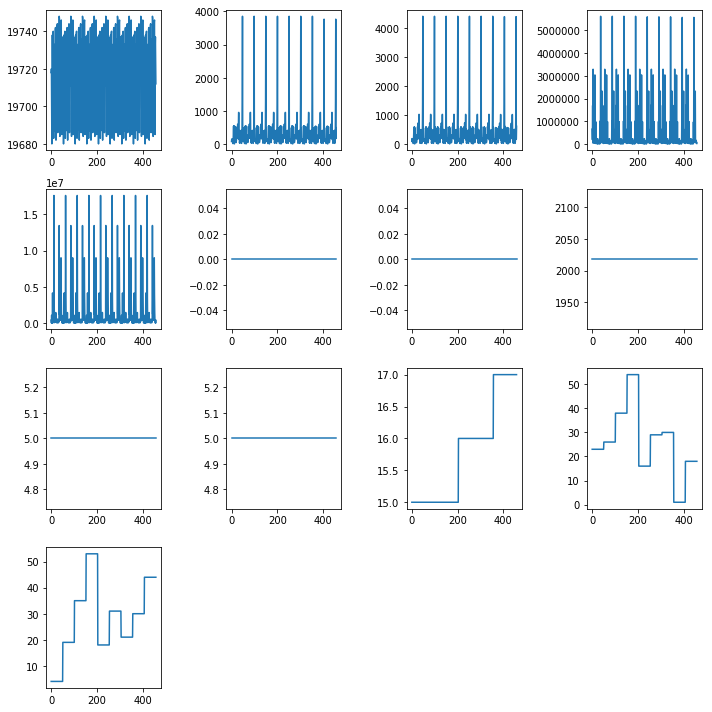

In [8]:
plt.figure(figsize=(10,10))
nrow, ncol = itemTimeData.shape
for c in range(ncol):
    plt.subplot(4, 4, c+1)
    plt.plot(itemTimeData[:, c])
    plt.tight_layout()

In [17]:
T = itemTimeData[:, 1:2]
X = itemTimeData[:, 2:]
Tname = names[1]
Xnames = names[2:]

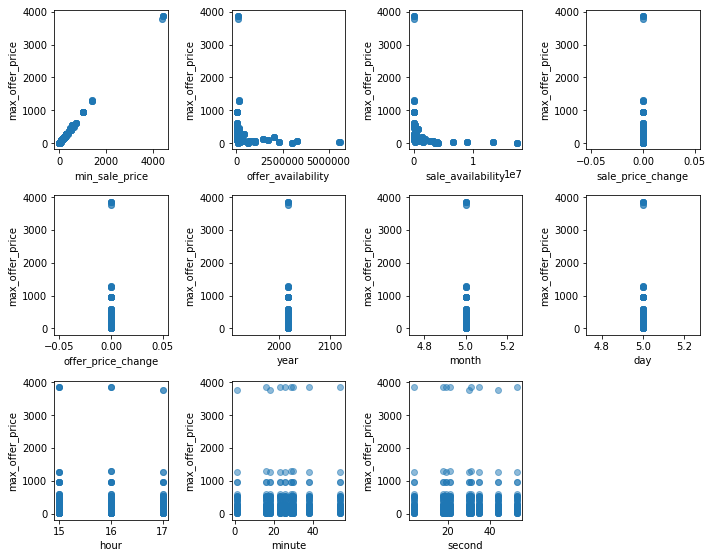

In [10]:
plt.figure(figsize=(10,10))
for c in range(X.shape[1]):
    plt.subplot(4, 4, c+1)
    plt.plot(X[:, c], T, 'o', alpha=0.5)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])
    plt.tight_layout()

In [18]:
X1 = np.insert(X, 0, 1, 1)
X.shape, X1.shape

((459, 11), (459, 12))

In [19]:
Xnames.insert(0, 'bias')

In [20]:
Xnames

['bias',
 'min_sale_price',
 'offer_availability',
 'sale_availability',
 'sale_price_change',
 'offer_price_change',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

In [21]:
nrows = X1.shape[0]
nTrain = int(round(nrow*0.8))
nTest = nrows - nTrain
nTrain, nTest, nTrain+nTest

(367, 92, 459)

In [22]:
rows = np.arange(nrows)
np.random.shuffle(rows)

In [23]:
trainIndices = rows[:nTrain]
testIndices = rows[nTrain:]

In [24]:
Xtrain = X1[trainIndices, :]
Ttrain = T[trainIndices, :]
Xtest = X1[testIndices, :]
Ttest = T[testIndices, :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((367, 12), (367, 1), (92, 12), (92, 1))

In [31]:
hiddens = [20]
nnet = nn.NeuralNetwork(Xtrain.shape[1],hiddens,1)

nnet.train(Xtrain, Ttrain, nIterations=1000, verbose=True)
nnet

SCG: Iteration 100 fValue Eval 0.000544481980488 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.000528616721867 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.000522954306794 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.000518493962858 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.000513471696901 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.000509695016134 Scale 1e-15
SCG: Iteration 700 fValue Eval 0.000506195146976 Scale 1e-15
SCG: Iteration 800 fValue Eval 0.000503461791659 Scale 1e-15
SCG: Iteration 900 fValue Eval 0.000490029393847 Scale 1e-15
SCG: Iteration 1000 fValue Eval 0.000472824494466 Scale 1e-15


NeuralNetwork(12, [20], 1)
   Network was trained for 1001 iterations that took 2.4292 seconds. Final error is 0.021744527920048773.

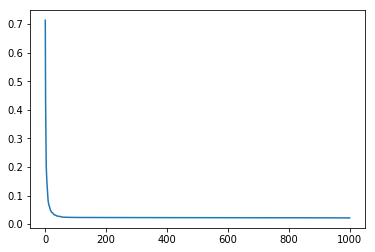

In [32]:
plt.plot(nnet.getErrors())

In [33]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [34]:
Ytrain = nnet.use(Xtrain)
Ytest = nnet.use(Xtest)
rmse(Ytrain, Ttrain), rmse(Ytest, Ttest)

(17.8981985909702, 19.767906844841747)

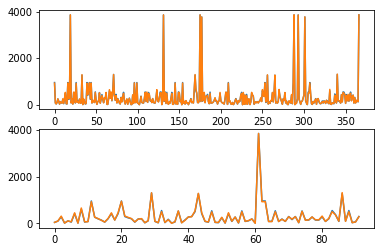

In [35]:
plt.subplot(2, 1, 1)
plt.plot(Ttrain)
plt.plot(Ytrain)
plt.subplot(2, 1, 2)
plt.plot(Ttest)
plt.plot(Ytest)

## Methods

In [41]:
# This method acts as the reinforcement and accounts for the 15% handling cost for selling items on the market
def checkForProfit(price_sold, price_bought):
    profit = (price_sold - (price_sold * 0.15)) - price_bought
    if profit > 0:
        return 1
    elif profit < 0:
        return -1
    else:
        return 0

Note: General training of net to be exposed to various states

The state for this training is
(max_offer_change, min_sale_change, offer_availability_change, sale_availability_change, units_possessed, unit_buy_price).
The first four compare state at timepoint 2 to state at timepoint 1. A value of 1 indicates t2 > t1, 0 indicates no change, and -1 indicates t2 < t1.
units_possessed is a value between 0 and 10 and unit_price is int between 1 and 100

In [37]:
from copy import copy

actions = (-1, 0, 1) # Possible actions (sale, none, buy)

# time 1
offer_price_T1 = random.randint(1, 100)
sale_price_T1 = random.randint(1, 100)
offer_avail_T1 = random.randint(1, 100)
sale_avail_T1 = random.randint(1, 100)

# time 2
offer_price_T2 = random.randint(1, 100)
sale_price_T2 = random.randint(1, 100)
offer_avail_T2 = random.randint(1, 100)
sale_avail_T2 = random.randint(1, 100)


def getTimeDifference(value_T1, value_T2):
    if value_T2 > value_T1:
        return 1
    elif value_T2 < value_T1:
        return -1
    else:
        return 0

def reinforcement(price_sold, price_bought):
    return checkForProfit(price_sold, price_bought)

def initialState():
    # (max_offer_change, min_sale_change, offer_availability_change, sale_availability_change)
    return np.array([getTimeDifference(offer_price_T1, offer_price_T2), getTimeDifference(sale_price_T1, sale_price_T2),
                     getTimeDifference(offer_avail_T1, offer_avail_T2), getTimeDifference(sale_avail_T1, sale_avail_T2),
                     random.randint(0,10), random.randint(1,100)])

def nextState(s, a):
    s = copy(s)
    s[4] += a
    if a == 1:
        s[5] = max(s[5], offer_price_T2)
    return s
        
def epsilonGreedy(nnetQ, state, actions, epsilon):
    if np.random.uniform() < epsilon:
        # Random Move
        action = np.random.choice(actions)
    else:
        # Greedy Move
        Qs = [nnetQ.use(np.hstack((state,a)).reshape((1, -1))) for a in actions]
        ai = np.argmax(Qs)
        action = actions[ai]
    Q = nnetQ.use(np.hstack((state,action)).reshape((1, -1)))
    return action, Q

def makeSamples(nnet, initialStateF, nextStateF, reinforcementF,
                validActions, numSamples, epsilon):

    X = np.zeros((numSamples, nnet.ni))
    R = np.zeros((numSamples, 1))
    Qn = np.zeros((numSamples, 1))

    s = initialStateF()
    s = nextStateF(s, 0)        # Update state, sn from s and a
    a, _ = epsilonGreedy(nnet, s, validActions, epsilon)

    # Collect data from numSamples steps
    for step in range(numSamples):
        sn = nextStateF(s, a)        # Update state, sn from s and a
        rn = reinforcementF(s, sn)   # Calculate resulting reinforcement
        an, qn = epsilonGreedy(nnet, sn, validActions, epsilon) # Forward pass for time t+1
        X[step, :] = np.hstack((s,a))
        R[step, 0] = rn
        Qn[step, 0] = qn
        # Advance one time step
        s, a = sn, an

    return (X, R, Qn)



## Results

## Conclusions

## References